In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('canteen_shop_data.csv')
df.head()

,Date,Time,Item,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers
0,2024-04-01,12:15,Sandwich,4.5,2,9.0,1,Cash,101,4,Sunny,Yes
1,2024-04-01,12:30,Drink,1.5,1,1.5,2,Card,102,3,Sunny,No
2,2024-04-01,12:45,Salad,5.0,1,5.0,3,Mobile Payment,103,5,Cloudy,Yes
3,2024-04-01,13:00,Burger,5.5,1,5.5,4,Cash,104,4,Sunny,No
4,2024-04-01,13:15,Sandwich,4.5,1,4.5,5,Card,105,3,Sunny,Yes


In [23]:

df["Total"] = df["Total"].astype(float)

total_spend = df.groupby("Customer ID")["Total"].sum().reset_index()


purchase_frequency = df.groupby("Customer ID")["Item"].count().reset_index()
purchase_frequency.rename(columns={"Item": "Frequency"}, inplace=True)


avg_spent = total_spend.copy()
avg_spent["Avg_Spent"] = total_spend["Total"] / purchase_frequency["Frequency"]


customer_features = total_spend.merge(purchase_frequency, on="Customer ID")
customer_features = customer_features.merge(avg_spent[["Customer ID", "Avg_Spent"]], on="Customer ID")

print(customer_features.head())


   Customer ID  Total  Frequency  Avg_Spent
0            1    9.0          1        9.0
1            2    1.5          1        1.5
2            3    5.0          1        5.0
3            4    5.5          1        5.5
4            5    4.5          1        4.5


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[["Total", "Frequency", "Avg_Spent"]])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(scaled_features)

cluster_labels = {
    0: "Low Spenders",
    1: "Medium Spenders",
    2: "High Spenders"
}
customer_features["Cluster_Label"] = customer_features["Cluster"].map(cluster_labels)

print(customer_features.head())


   Customer ID  Total  Frequency  Avg_Spent  Cluster    Cluster_Label
0            1    9.0          1        9.0        1  Medium Spenders
1            2    1.5          1        1.5        2    High Spenders
2            3    5.0          1        5.0        0     Low Spenders
3            4    5.5          1        5.5        0     Low Spenders
4            5    4.5          1        4.5        0     Low Spenders


In [25]:
from scipy.stats import ttest_ind

cluster_0 = customer_features[customer_features["Cluster"] == 0]["Total"]
cluster_1 = customer_features[customer_features["Cluster"] == 1]["Total"]

t_stat, p_value = ttest_ind(cluster_0, cluster_1)
print(f"T-test: t={t_stat}, p={p_value}")


T-test: t=-47.26264465306802, p=3.457502769196151e-91


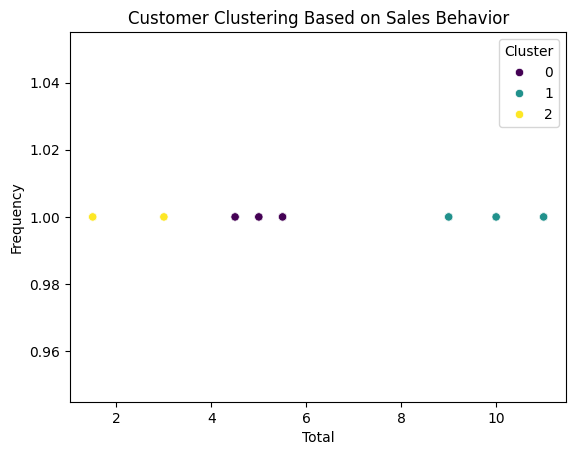

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x=customer_features["Total"], y=customer_features["Frequency"], hue=customer_features["Cluster"], palette="viridis")
plt.title("Customer Clustering Based on Sales Behavior")
plt.show()
